Importamos el dataset

In [ ]:
import os
from google.colab import files
import shutil

new_folder = 'dataset'

if os.path.isdir(new_folder):
  shutil.rmtree(new_folder)

os.mkdir(new_folder)

# Upload Files
uploaded = files.upload()
for filename in uploaded.keys():
  dst_path = os.path.join(new_folder, filename)
  print(f'move {filename} to {dst_path}')
  shutil.move(filename, dst_path)

Saving bookings.csv to bookings.csv
move bookings.csv to dataset/bookings.csv


Importamos las librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.neural_network import MLPClassifier

from warnings import filterwarnings
filterwarnings('ignore')

Cargamos los datos en el dataframe

In [ ]:
df = pd.read_csv("./dataset/bookings.csv")

Hacemos un muestreo de los datos

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Mostramos las dimensiones del dataframe

In [ ]:
df.shape

(119390, 32)

Mostramos la cantidad de datos vacíos en cada característica

In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

Hacemos una copia del dataframe para realizar las modificaciones necesarias

In [ ]:
data = df.copy()

Cancelaciones de clientes que repiten

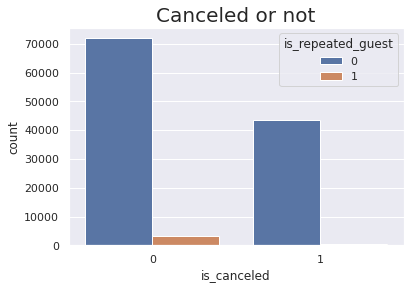

In [ ]:
sns.set(style = "darkgrid")
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = data)

Distribución boxplot de noches pasadas en los hoteles según segmento de mercado y tipo de hotel

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_week_nights'>

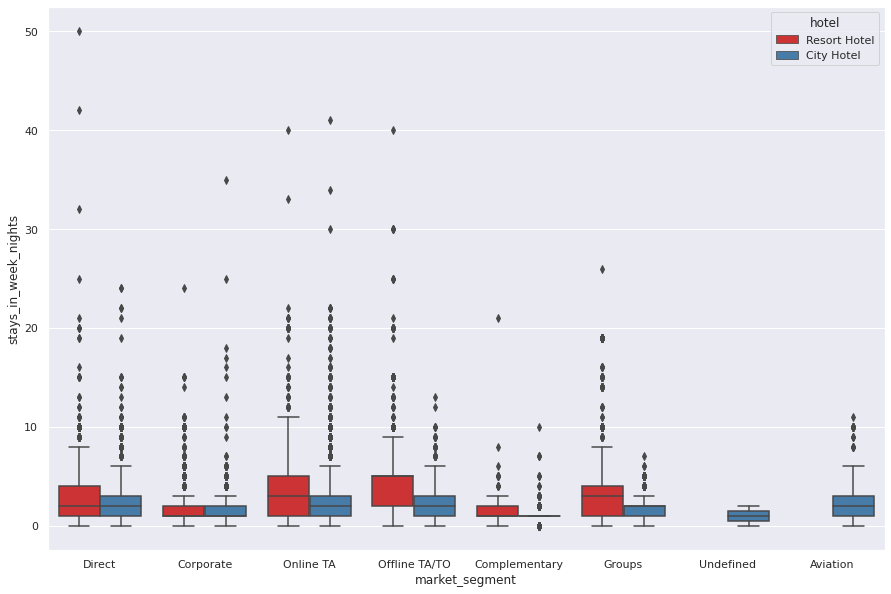

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "market_segment", y = "stays_in_week_nights", data = data, hue = "hotel", palette = 'Set1')

<AxesSubplot:xlabel='market_segment', ylabel='stays_in_weekend_nights'>

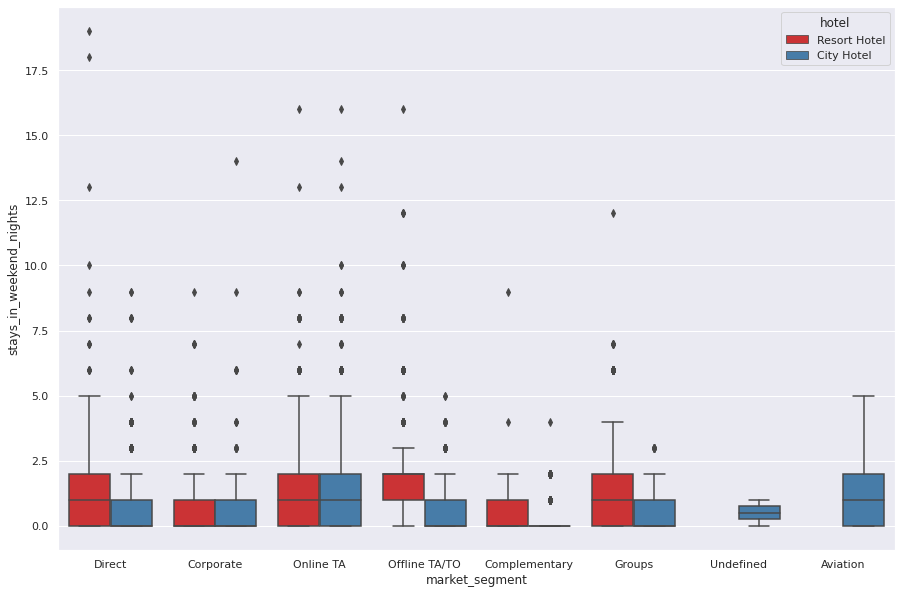

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x = "market_segment", y = "stays_in_weekend_nights", data = data, hue = "hotel", palette = 'Set1')

Distribución countplot de segmentos de mercado

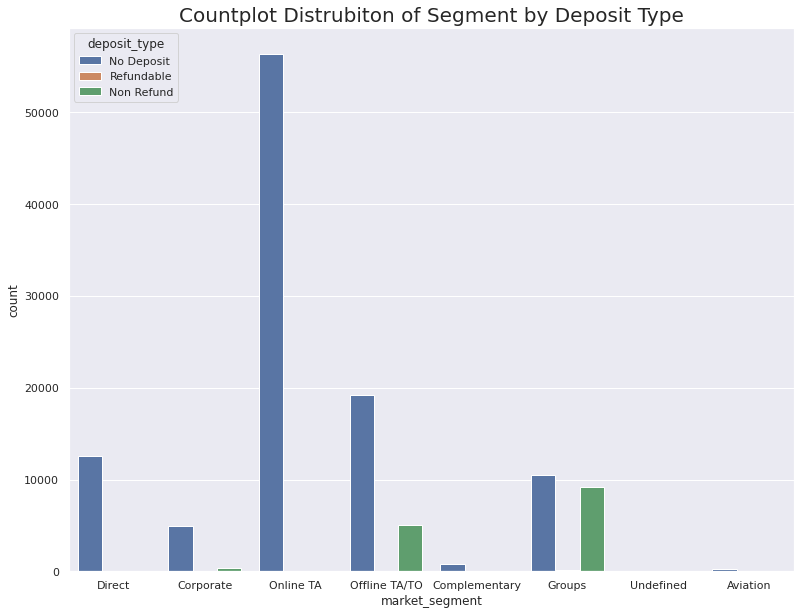

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distrubiton of Segment by Deposit Type", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'deposit_type', data = data)

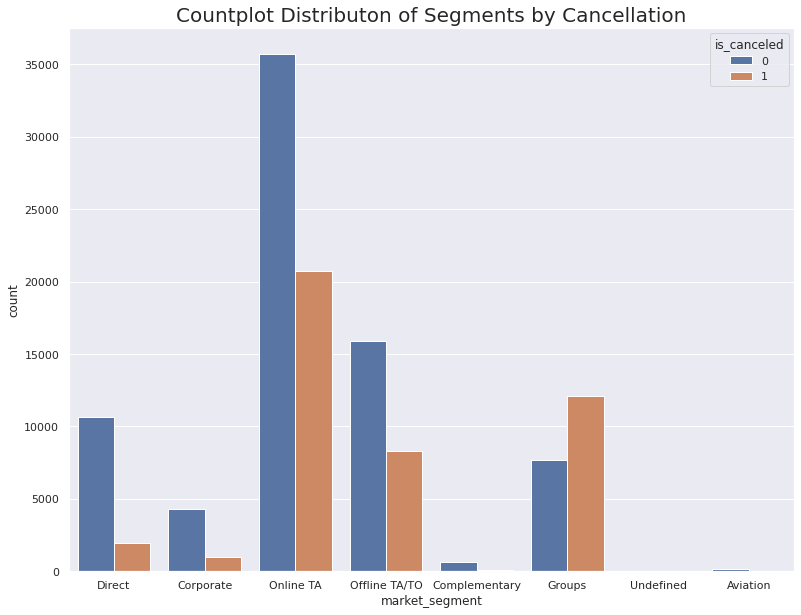

In [ ]:
plt.figure(figsize = (13,10))
sns.set(style = "darkgrid")
plt.title("Countplot Distributon of Segments by Cancellation", fontdict = {'fontsize':20})
ax = sns.countplot(x = "market_segment", hue = 'is_canceled', data = data)

Curva de densidad del tiempo según cancelación

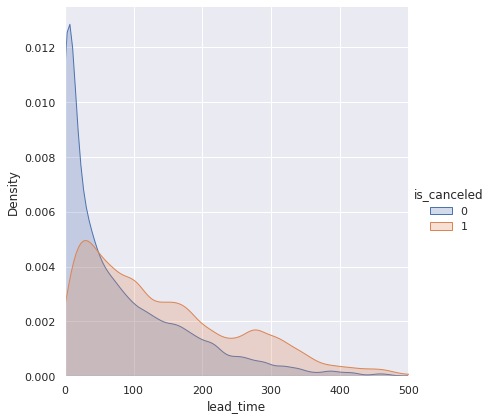

In [ ]:
(sns.FacetGrid(data, hue = 'is_canceled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend())

Cancelaciones mensuales y clientes según tipo de hotel

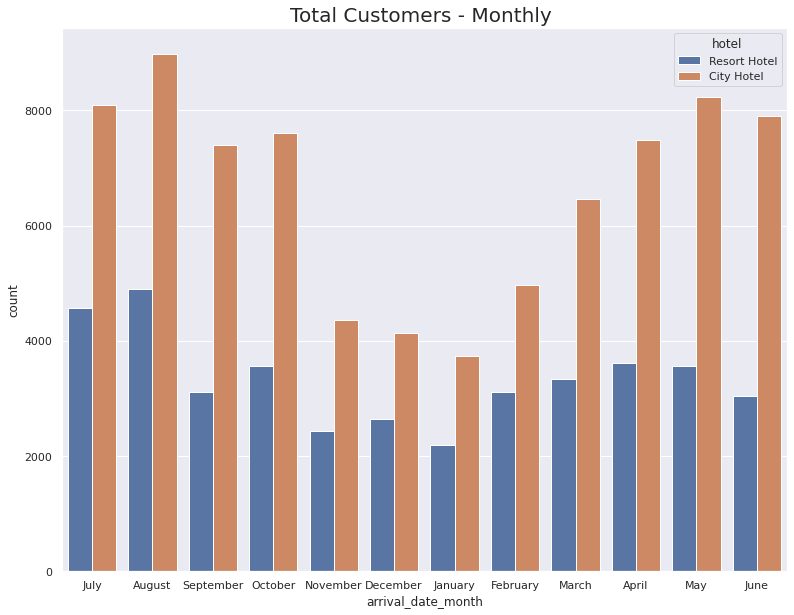

In [ ]:
plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)

<AxesSubplot:xlabel='arrival_date_month', ylabel='is_canceled'>

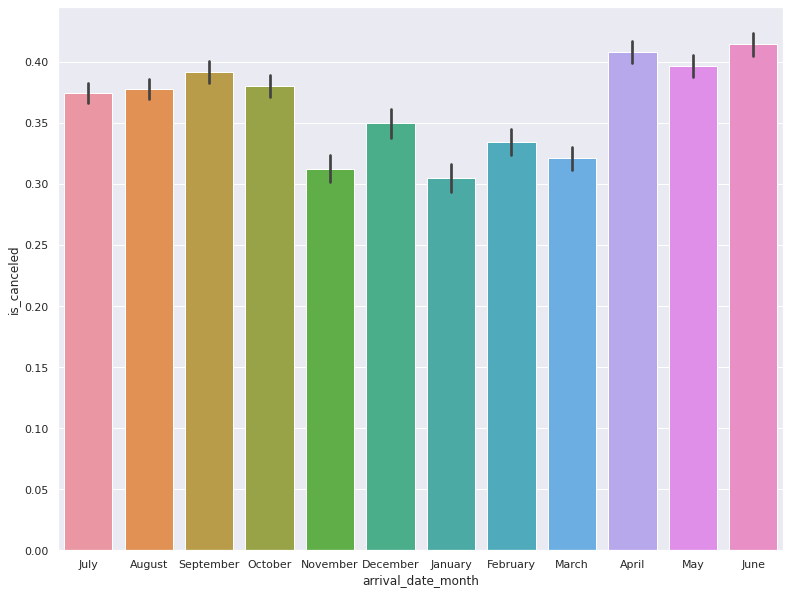

In [ ]:
plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', data = data)

<AxesSubplot:xlabel='arrival_date_month', ylabel='is_canceled'>

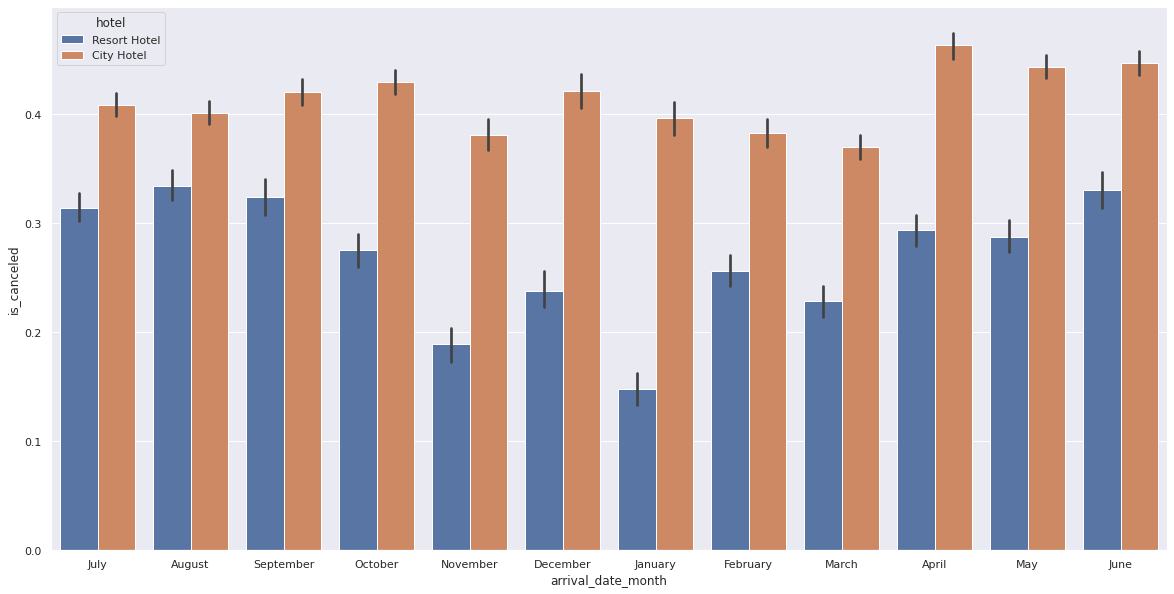

In [ ]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_canceled', hue = 'hotel', data = data)

# Preprocesamiento
## Valores vacíos, feature engineering y estandarización

Mostramos la cantidad de valores vacíos en cada característica

In [ ]:
print("# of NaN in each columns:", df.isnull().sum(), sep='\n')

# of NaN in each columns:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                          

Definimos una función para ver el porcentaje de valores perdidos en las características Company, Agent y Country

In [ ]:
def perc_mv(x, y):
    perc = y.isnull().sum() / len(x) * 100
    return perc

print('Missing value ratios:\nCompany: {}\nAgent: {}\nCountry: {}'.format(perc_mv(df, df['company']),
                                                                                   perc_mv(df, df['agent']),
                                                                                   perc_mv(df, df['country'])))

Missing value ratios:
Company: 94.30689337465449
Agent: 13.686238378423655
Country: 0.40874445095904177


Realizamos un conteo de valores de la columna Agent (al tener pocos valores perdidos, no borramos esta columna)

In [ ]:
data["agent"].value_counts().count()

333

Debido al porcentaje de valores perdidos, eliminamos Company

In [ ]:
data = data.drop(['company'], axis = 1)

# Comprobaciones de valores en características categóricas

A continuación realizo una serie de comprobaciones en cada columna categórica para conocer cual es el valor con mayor porcentaje de aparición.

Esta información me será útil más adelante.

<AxesSubplot:xlabel='meal', ylabel='count'>

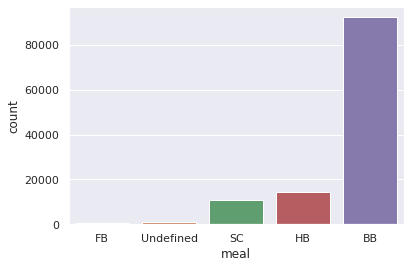

In [ ]:
sns.countplot(data["meal"], order=data["meal"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='market_segment', ylabel='count'>

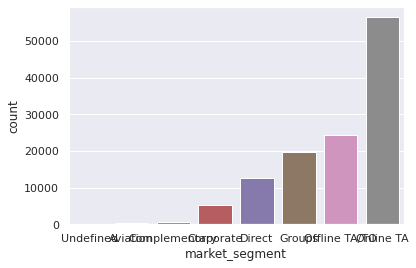

In [ ]:
sns.countplot(data["market_segment"], order=data["market_segment"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='distribution_channel', ylabel='count'>

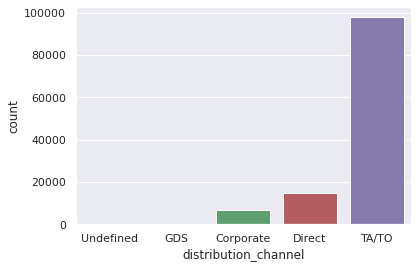

In [ ]:
sns.countplot(data["distribution_channel"], order=data["distribution_channel"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

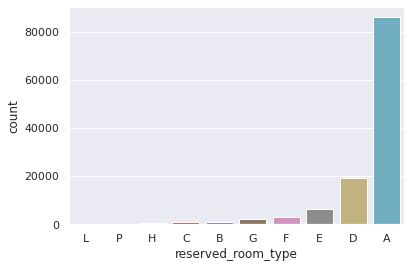

In [ ]:
sns.countplot(data["reserved_room_type"], order=data["reserved_room_type"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='assigned_room_type', ylabel='count'>

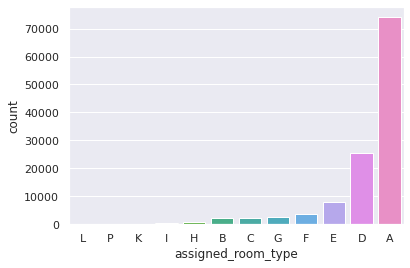

In [ ]:
sns.countplot(data["assigned_room_type"], order=data["assigned_room_type"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='deposit_type', ylabel='count'>

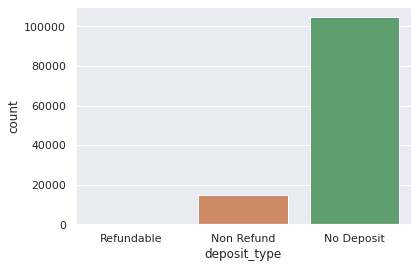

In [ ]:
sns.countplot(data["deposit_type"], order=data["deposit_type"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='customer_type', ylabel='count'>

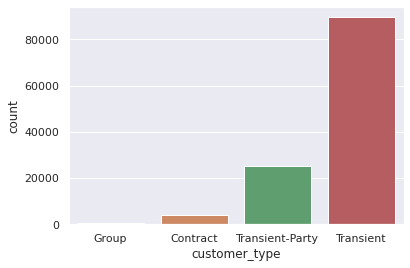

In [ ]:
sns.countplot(data["customer_type"], order=data["customer_type"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='reservation_status', ylabel='count'>

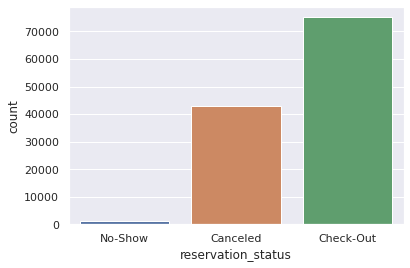

In [ ]:
sns.countplot(data["reservation_status"], order=data["reservation_status"].value_counts(ascending=True).index)

<AxesSubplot:xlabel='reservation_status_date', ylabel='count'>

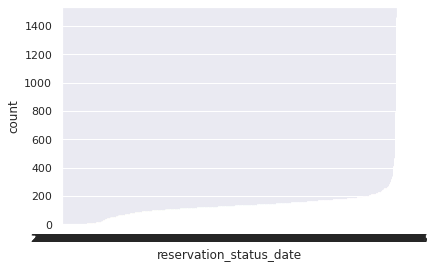

In [ ]:
sns.countplot(data["reservation_status_date"], order=data["reservation_status_date"].value_counts(ascending=True).index)

Debido a la cantidad de valores en reservation_status_date, voy a comprobar los últimos 5 valores para ver cual fue el año de las últimas fechas regristradas.

In [ ]:
data["reservation_status_date"].tail()

119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, dtype: object

Una vez realizadas las comprobaciones anteriores, voy a usar fillna para rellenar los valores vacíos.

* Para datos numéricos, rellenaré los valores perdidos con un 0.
* Para datos categóricos, rellenaré los valores perdidos con el dato más repetido.

In [ ]:
data['adults'] = data['adults'].fillna(0)
data['children'] = data['children'].fillna(0)
data['babies'] = data['babies'].fillna(0)
data['meal'] = data['meal'].fillna("BB")
data['market_segment'] = data['market_segment'].fillna("Online TA")
data['distribution_channel'] = data['distribution_channel'].fillna("TA/TO")
data['is_repeated_guest'] = data['is_repeated_guest'].fillna(0)
data['previous_cancellations'] = data['previous_cancellations'].fillna(0)
data['previous_bookings_not_canceled'] = data['previous_bookings_not_canceled'].fillna(0)
data['reserved_room_type'] = data['reserved_room_type'].fillna("A")
data['assigned_room_type'] = data['assigned_room_type'].fillna("A")
data['booking_changes'] = data['booking_changes'].fillna(0)
data['deposit_type'] = data['deposit_type'].fillna("No Deposit")
data['days_in_waiting_list'] = data['days_in_waiting_list'].fillna(0)
data['customer_type'] = data['customer_type'].fillna("Transient")
data['adr'] = data['adr'].fillna(0)
data['required_car_parking_spaces'] = data['required_car_parking_spaces'].fillna(0)
data['total_of_special_requests'] = data['total_of_special_requests'].fillna(0)
data['reservation_status'] = data['reservation_status'].fillna("Check-Out")
data['reservation_status_date'] = data['reservation_status_date'].fillna("2017-09-07")

# Manipulación de características

Mostramos los tipos de cada característica

In [ ]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Añadimos las etiquetas de cada dato en hotel y arrival_date_month

In [ ]:
data['hotel'] = data['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

data['arrival_date_month'] = data['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

Para el resto de características, lo haré mediante una función para cada una

In [ ]:
def family(data):
    if ((data['adults'] > 0) & (data['children'] > 0)):
        val = 1
    elif ((data['adults'] > 0) & (data['babies'] > 0)):
        val = 1
    else:
        val = 0
    return val

def deposit(data):
    if ((data['deposit_type'] == 'No Deposit') | (data['deposit_type'] == 'Refundable')):
        return 0
    else:
        return 1

In [ ]:
def feature(data):
    data["is_family"] = data.apply(family, axis = 1)
    data["total_customer"] = data["adults"] + data["children"] + data["babies"]
    data["deposit_given"] = data.apply(deposit, axis=1)
    data["total_nights"] = data["stays_in_weekend_nights"]+ data["stays_in_week_nights"]
    return data

data = feature(data)

Para finalizar, eliminamos las columnas adults, babies, children, deposit_type y reservation_status_date debido a que sus datos ya se encuentran dentro de las nuevas características

In [ ]:
data = data.drop(columns = ['adults', 'babies', 'children', 'deposit_type', 'reservation_status_date'])

# Correlación

Muestreo de las columnas del dataframe

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

Realizamos otra copia del dataframe para seguir trabajando con este

In [ ]:
cor_data = data.copy()

Inicializamos el objeto LabelEncoder

In [ ]:
le = LabelEncoder()

Utilizamos el le para transformar los siguientes datos:

In [ ]:
cor_data['meal'] = le.fit_transform(cor_data['meal'])
cor_data['distribution_channel'] = le.fit_transform(cor_data['distribution_channel'])
cor_data['reserved_room_type'] = le.fit_transform(cor_data['reserved_room_type'])
cor_data['assigned_room_type'] = le.fit_transform(cor_data['assigned_room_type'])
cor_data['agent'] = le.fit_transform(cor_data['agent'])
cor_data['customer_type'] = le.fit_transform(cor_data['customer_type'])
cor_data['reservation_status'] = le.fit_transform(cor_data['reservation_status'])
cor_data['market_segment'] = le.fit_transform(cor_data['market_segment'])

Comprobamos la correlación de datos

In [ ]:
cor_data.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,is_family,total_customer,deposit_given,total_nights
hotel,1.000000,0.136531,0.075381,0.035267,0.001817,0.001270,-0.001862,-0.186596,-0.234020,0.008018,...,0.072432,0.047531,0.096719,-0.218873,-0.043390,-0.124331,-0.058306,-0.040821,0.172003,-0.247479
is_canceled,0.136531,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.001791,0.024765,-0.017678,...,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,-0.013010,0.046522,0.481457,0.017779
lead_time,0.075381,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.085671,0.165799,0.000349,...,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,-0.043972,0.072265,0.380179,0.157167
arrival_date_year,0.035267,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.021497,0.030883,0.065840,...,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.052711,0.052127,-0.065963,0.031438
arrival_date_month,0.001817,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,0.018440,0.019212,-0.015205,...,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.010427,0.027252,0.008746,0.021536
arrival_date_week_number,0.001270,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,0.018208,0.015558,-0.017381,...,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.010611,0.025220,0.007773,0.018719
arrival_date_day_of_month,-0.001862,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.016354,-0.028174,-0.007086,...,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,0.014710,0.006742,-0.008616,-0.027408
stays_in_weekend_nights,-0.186596,-0.001791,0.085671,0.021497,0.018440,0.018208,-0.016354,1.000000,0.498969,0.045744,...,-0.054151,-0.109220,0.049342,-0.018554,0.072671,0.008558,0.052306,0.101426,-0.114275,0.762790
stays_in_week_nights,-0.234020,0.024765,0.165799,0.030883,0.019212,0.015558,-0.028174,0.498969,1.000000,0.036742,...,-0.002020,-0.127223,0.065237,-0.024859,0.068192,-0.021607,0.050424,0.101665,-0.079999,0.941005
meal,0.008018,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,0.045744,0.036742,1.000000,...,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,-0.041727,-0.005975,-0.090725,0.045277


Reordenamos los valores de la característica is_canceled dentro de la correlación para observarla. Como se puede apreciar, esta columna tiene mucho impacto.

In [ ]:
cor_data.corr()["is_canceled"].sort_values()

reservation_status               -0.917196
total_of_special_requests        -0.234658
required_car_parking_spaces      -0.195498
assigned_room_type               -0.176028
booking_changes                  -0.144381
agent                            -0.130010
is_repeated_guest                -0.084793
customer_type                    -0.068140
reserved_room_type               -0.061282
previous_bookings_not_canceled   -0.057358
meal                             -0.017678
is_family                        -0.013010
arrival_date_day_of_month        -0.006130
stays_in_weekend_nights          -0.001791
arrival_date_week_number          0.008148
arrival_date_month                0.011022
arrival_date_year                 0.016660
total_nights                      0.017779
stays_in_week_nights              0.024765
total_customer                    0.046522
adr                               0.047557
days_in_waiting_list              0.054186
market_segment                    0.059338
previous_ca

Observamos la correlación con la columna stays_in_week_nights

In [ ]:
cor_data.corr()['stays_in_week_nights']

hotel                            -0.234020
is_canceled                       0.024765
lead_time                         0.165799
arrival_date_year                 0.030883
arrival_date_month                0.019212
arrival_date_week_number          0.015558
arrival_date_day_of_month        -0.028174
stays_in_weekend_nights           0.498969
stays_in_week_nights              1.000000
meal                              0.036742
market_segment                    0.108569
distribution_channel              0.087185
is_repeated_guest                -0.097245
previous_cancellations           -0.013992
previous_bookings_not_canceled   -0.048743
reserved_room_type                0.168616
assigned_room_type                0.100795
booking_changes                   0.096209
agent                             0.014903
days_in_waiting_list             -0.002020
customer_type                    -0.127223
adr                               0.065237
required_car_parking_spaces      -0.024859
total_of_sp

Eliminamos las columnas total_nights, arrival_date_week_number, stays_in_weekend_nights, arrival_date_month y agent, ya que no tendría mucho impacto

In [ ]:
cor_data = cor_data.drop(columns = ['total_nights', 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

Borramos los datos vacías de Country

In [ ]:
indices = cor_data.loc[pd.isna(cor_data["country"]), :].index 
cor_data = cor_data.drop(cor_data.index[indices])   
cor_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_day_of_month         0
stays_in_week_nights              0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
is_family                         0
total_customer                    0
deposit_given                     0
dtype: int64

Una vez tomada las decisiones sobre qué hacer con los datos, vuelvo a data para seguir trabajando con ello

In [ ]:
indices = data.loc[pd.isna(data["country"]), :].index 
data = data.drop(data.index[indices])   
data = data.drop(columns = ['arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1)

Hago un muestreo de las columnas de data

In [ ]:
data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'meal', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'is_family', 'total_customer', 'deposit_given',
       'total_nights'],
      dtype='object')

Realizamos una copia de data para continuar trabajando

In [ ]:
df1 = data.copy()

Realizamos el one hot encoding

In [ ]:
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'reservation_status'])

Usamos le para etiquetar Country

In [ ]:
df1['country'] = le.fit_transform(df1['country']) 

Creamos df2, eliminando las columnas reservation_status_Canceled, reservation_status_Check-Out y reservation_status_No-Show para continuar trabajando sobre nuestros datos

In [ ]:
df2 = df1.drop(columns = ['reservation_status_Canceled', 'reservation_status_Check-Out', 'reservation_status_No-Show'], axis = 1)

Realizamos la separación de datos. Para esta práctica, he hecho una separación de 70/30, y he utilizado la semilla aleatoria 42

In [ ]:
y = df2["is_canceled"]
X = df2.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

Creo dos funciones, una para aplicar la matriz de confusión y otra para mostrar la curva ROC

In [ ]:
def model(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_prob, y_pred
    y_prob = alg.predict_proba(X_test)[:,1]
    y_pred = alg_model.predict(X_test)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))
    

def ROC(y_test, y_prob):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

# Creación del modelo y entrenamiento de la Red Neuronal

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print('Model: Neural Network\n')
model(MLPClassifier(), X_train_scaled, X_test_scaled, y_train, y_test)

Model: Neural Network

Accuracy Score: 0.8513358190126433

Confusion Matrix:
 [[19831  2522]
 [ 2781 10537]]


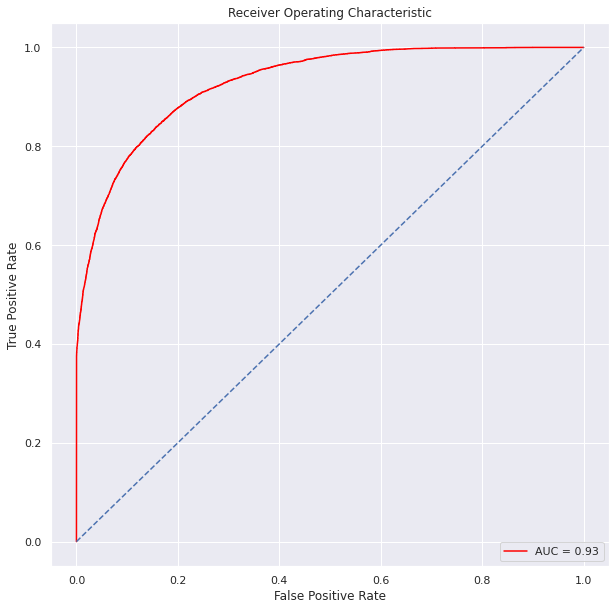

In [ ]:
ROC(y_test, y_prob)